<a href="https://colab.research.google.com/github/ameliachoi/DeepLearningZeroToAll/blob/master/apt_price_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019년 서울 아파트 가격 데이터 비교하기

## Table of Contents

01. Introduction

02. Data Wrangling

03. Exploratory Data Analysis

---

### 1. Introduction

In [1]:
# setting
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# 한글 폰트 깨짐 해결하기
import matplotlib as mpl
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/content/NanumSquareRoundR.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumSquareRoundR')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


In [3]:
df = pd.read_csv('https://bit.ly/apt_price_2019_csv', thousands=',', encoding='utf-8')  #thousands : 콤마 제거, int 변환 용이
df.head()

,거래금액,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드,법정동,법정동본번코드,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,아파트,월,일,일련번호,전용면적,지번,지역코드,층,시도명,시군구
0,132000,2005,2019,선릉로69길,20.0,0.0,11680.0,1,0.0,4166489.0,역삼동,755,4,11680,10100,1,e-편한세상,1,3,11680-3622,59.606,755-4,11680,14,서울시,강남구
1,61000,2004,2019,테헤란로4길,32.0,0.0,11680.0,1,0.0,4166743.0,역삼동,826,29,11680,10100,1,역삼동우정에쉐르1,1,5,11680-504,59.810,826-29,11680,8,서울시,강남구
2,132000,2005,2019,선릉로69길,20.0,0.0,11680.0,1,0.0,4166489.0,역삼동,755,4,11680,10100,1,e-편한세상,1,11,11680-3622,59.606,755-4,11680,12,서울시,강남구
3,19500,2014,2019,테헤란로14길,13.0,0.0,11680.0,1,0.0,4166719.0,역삼동,735,15,11680,10100,1,(735-15),1,16,11680-4317,15.250,735-15,11680,14,서울시,강남구
4,130000,2014,2019,테헤란로52길,16.0,0.0,11680.0,1,0.0,4166745.0,역삼동,709,5,11680,10100,1,테헤란아이파크,1,23,11680-4296,84.641,709-5,11680,8,서울시,강남구


In [4]:
df.tail()

,거래금액,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드,법정동,법정동본번코드,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,아파트,월,일,일련번호,전용면적,지번,지역코드,층,시도명,시군구
42193,35500,1993,2019,신내로,128.0,0.0,11260.0,2,0.0,3106007.0,신내동,397,0,11260,10600,1,동성1,10,16,11260-83,59.40,397,11260,1,서울시,중랑구
42194,24950,1996,2019,봉화산로,193.0,0.0,11260.0,3,0.0,3106003.0,신내동,661,0,11260,10600,1,신내11대명,10,17,11260-99,39.76,661,11260,15,서울시,중랑구
42195,34000,1996,2019,봉화산로,193.0,0.0,11260.0,0,0.0,3106003.0,신내동,661,0,11260,10600,1,신내11대명,10,17,11260-99,49.77,661,11260,10,서울시,중랑구
42196,23000,1996,2019,봉화산로,193.0,0.0,11260.0,3,0.0,3106003.0,신내동,661,0,11260,10600,1,신내11대명,10,21,11260-99,39.76,661,11260,1,서울시,중랑구
42197,56000,2013,2019,신내역로,165.0,0.0,11260.0,0,NaN,3106013.0,신내동,817,0,11260,10600,1,신내 데시앙포레,10,21,11260-2821,84.94,817,11260,1,서울시,중랑구


In [5]:
df.shape # 서울시에 약 4만 2천개의 아파트 dataset

(42198, 26)

In [6]:
df.sort_values(by ='거래금액', ascending=False, inplace=True) # 거래금액이 높은 순으로 살펴보기
df.head(20)

,거래금액,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드,법정동,법정동본번코드,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,아파트,월,일,일련번호,전용면적,지번,지역코드,층,시도명,시군구
1477,840000,2011,2019,독서당로,111.0,0.0,11170.0,1,0.0,3005014.0,한남동,810,0,11170,13100,1,한남더힐,1,10,11170-2839,244.749,810,11170,3,서울시,용산구
19350,820000,2011,2019,독서당로,111.0,0.0,11170.0,1,0.0,3005014.0,한남동,810,0,11170,13100,1,한남더힐,6,14,11170-2839,244.749,810,11170,3,서울시,용산구
8179,730000,2011,2019,독서당로,111.0,0.0,11170.0,1,0.0,3005014.0,한남동,810,0,11170,13100,1,한남더힐,4,18,11170-2839,243.201,810,11170,1,서울시,용산구
12525,695000,2011,2019,독서당로,111.0,0.0,11170.0,1,0.0,3005014.0,한남동,810,0,11170,13100,1,한남더힐,5,16,11170-2839,243.201,810,11170,1,서울시,용산구
34595,690000,2011,2019,독서당로,111.0,0.0,11170.0,1,0.0,3005014.0,한남동,810,0,11170,13100,1,한남더힐,8,13,11170-2839,240.305,810,11170,3,서울시,용산구
2966,660000,2011,2019,독서당로,111.0,0.0,11170.0,1,0.0,3005014.0,한남동,810,0,11170,13100,1,한남더힐,2,11,11170-2839,240.230,810,11170,2,서울시,용산구
5207,655000,2011,2019,독서당로,111.0,0.0,11170.0,1,0.0,3005014.0,한남동,810,0,11170,13100,1,한남더힐,3,15,11170-2839,240.230,810,11170,2,서울시,용산구
5203,650000,2011,2019,독서당로,111.0,0.0,11170.0,1,0.0,3005014.0,한남동,810,0,11170,13100,1,한남더힐,3,4,11170-2839,240.230,810,11170,3,서울시,용산구
5206,645000,2011,2019,독서당로,111.0,0.0,11170.0,1,0.0,3005014.0,한남동,810,0,11170,13100,1,한남더힐,3,12,11170-2839,240.305,810,11170,1,서울시,용산구
12521,630000,2011,2019,독서당로,111.0,0.0,11170.0,1,0.0,3005014.0,한남동,810,0,11170,13100,1,한남더힐,5,13,11170-2839,240.230,810,11170,-1,서울시,용산구


In [7]:
df.columns

Index(['거래금액', '건축년도', '년', '도로명', '도로명건물본번호코드', '도로명건물부번호코드', '도로명시군구코드',
       '도로명일련번호코드', '도로명지상지하코드', '도로명코드', '법정동', '법정동본번코드', '법정동부번코드',
       '법정동시군구코드', '법정동읍면동코드', '법정동지번코드', '아파트', '월', '일', '일련번호', '전용면적',
       '지번', '지역코드', '층', '시도명', '시군구'],
      dtype='object')

In [8]:
df.dtypes

거래금액            int64
건축년도            int64
년               int64
도로명            object
도로명건물본번호코드    float64
도로명건물부번호코드    float64
도로명시군구코드      float64
도로명일련번호코드       int64
도로명지상지하코드     float64
도로명코드         float64
법정동            object
법정동본번코드         int64
법정동부번코드         int64
법정동시군구코드        int64
법정동읍면동코드        int64
법정동지번코드         int64
아파트            object
월               int64
일               int64
일련번호           object
전용면적          float64
지번             object
지역코드            int64
층               int64
시도명            object
시군구            object
dtype: object

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
거래금액,42198.0,8.017049e+04,58330.266780,5400.00,42500.00,64000.00,97000.00,840000.00
건축년도,42198.0,2.000153e+03,10.107444,1965.00,1993.00,2001.00,2007.00,2019.00
년,42198.0,2.019000e+03,0.000000,2019.00,2019.00,2019.00,2019.00,2019.00
도로명건물본번호코드,42181.0,1.511780e+02,234.556292,0.00,25.00,62.00,176.00,2803.00
도로명건물부번호코드,42181.0,9.083474e-01,4.738965,0.00,0.00,0.00,0.00,121.00
도로명시군구코드,42181.0,1.146341e+04,235.822308,11110.00,11320.00,11470.00,11620.00,43150.00
도로명일련번호코드,42198.0,1.480591e+00,1.395978,0.00,1.00,1.00,2.00,27.00
도로명지상지하코드,40160.0,0.000000e+00,0.000000,0.00,0.00,0.00,0.00,0.00
도로명코드,42181.0,3.559927e+06,593182.728923,2000003.00,3109006.00,3124001.00,4142093.00,4517661.00
법정동본번코드,42198.0,5.698413e+02,537.965581,0.00,175.00,472.00,792.00,6040.00


---

### 2. Data Wrangling

In [10]:
df.isnull().sum()

거래금액             0
건축년도             0
년                0
도로명             33
도로명건물본번호코드      17
도로명건물부번호코드      17
도로명시군구코드        17
도로명일련번호코드        0
도로명지상지하코드     2038
도로명코드           17
법정동              0
법정동본번코드          0
법정동부번코드          0
법정동시군구코드         0
법정동읍면동코드         0
법정동지번코드          0
아파트              0
월                0
일                0
일련번호          1425
전용면적             0
지번              15
지역코드             0
층                0
시도명              0
시군구              0
dtype: int64

In [11]:
# 일련번호나 지번과 같은 데이터는 필요치 않기 때문에 따로 결측치 변환 과정을 거치지 않음
# 우리가 필요한 데이터만 따로 골라보기
df = df[['건축년도', '시도명', '시군구', '법정동', '아파트', '거래금액','월', '일', '층', '전용면적']]
df.head(30)

,건축년도,시도명,시군구,법정동,아파트,거래금액,월,일,층,전용면적
1477,2011,서울시,용산구,한남동,한남더힐,840000,1,10,3,244.749
19350,2011,서울시,용산구,한남동,한남더힐,820000,6,14,3,244.749
8179,2011,서울시,용산구,한남동,한남더힐,730000,4,18,1,243.201
12525,2011,서울시,용산구,한남동,한남더힐,695000,5,16,1,243.201
34595,2011,서울시,용산구,한남동,한남더힐,690000,8,13,3,240.305
2966,2011,서울시,용산구,한남동,한남더힐,660000,2,11,2,240.230
5207,2011,서울시,용산구,한남동,한남더힐,655000,3,15,2,240.230
5203,2011,서울시,용산구,한남동,한남더힐,650000,3,4,3,240.230
5206,2011,서울시,용산구,한남동,한남더힐,645000,3,12,1,240.305
12521,2011,서울시,용산구,한남동,한남더힐,630000,5,13,-1,240.230


In [12]:
df.tail(30)

,건축년도,시도명,시군구,법정동,아파트,거래금액,월,일,층,전용면적
3968,2012,서울시,노원구,공릉동,진명비베레,8500,3,13,4,12.3536
1643,2013,서울시,중랑구,면목동,신영,8400,1,9,5,14.4300
36006,2013,서울시,강서구,화곡동,한양아이클래스,8300,9,16,6,13.7900
35980,2013,서울시,강서구,화곡동,한양아이클래스,8300,9,4,7,13.7900
3507,2013,서울시,강서구,화곡동,한양아이클래스,8270,3,9,7,13.7900
36471,1995,서울시,구로구,구로동,성산E동,8100,9,4,3,21.9000
36473,1995,서울시,구로구,구로동,성산E동,8100,9,4,2,21.9000
36477,1995,서울시,구로구,구로동,성산E동,8100,9,4,4,21.9000
12772,2013,서울시,중랑구,면목동,신영,8000,5,20,4,13.1800
6193,1999,서울시,광진구,화양동,화양타워,8000,4,29,2,16.7700


---

### 3. Exploratory Data Analysis

#### 1) 상위 / 하위 10% 데이터 따로보기

In [13]:
# 가격 기준 상위 10% 데이터 셋 따로 분류
# 상위 10% = 42198 * 0.1 = 4220건으로 계산

df_top = df.iloc[:4220, :]
df_top.tail()

,건축년도,시도명,시군구,법정동,아파트,거래금액,월,일,층,전용면적
33833,1988,서울시,송파구,방이동,올림픽선수기자촌3단지,155000,8,1,20,83.06
11062,1989,서울시,서초구,잠원동,한강,155000,5,3,3,84.53
26538,2008,서울시,송파구,신천동,파크리오,155000,7,9,28,84.90
17679,2006,서울시,송파구,잠실동,레이크팰리스,155000,6,6,14,84.82
32588,1976,서울시,서초구,방배동,삼호2,155000,8,30,11,131.41


In [14]:
# 가격 기준 하위 10% 데이터 셋 따로 분류
# 하위 10% = 42198 - 4220 => 37978 ~ 42198위 데이터 분류

df_bottom = df.iloc[37978:, :]
df_bottom.head()

,건축년도,시도명,시군구,법정동,아파트,거래금액,월,일,층,전용면적
15656,1990,서울시,도봉구,쌍문동,금호1,29300,6,28,2,54.48
15328,1988,서울시,노원구,상계동,상계주공9(고층),29300,6,17,13,41.30
23179,1993,서울시,노원구,중계동,주공7,29300,7,8,12,44.10
115,2018,서울시,강동구,길동,다성이즈빌,29300,1,17,12,23.39
15874,1991,서울시,도봉구,도봉동,극동,29250,6,18,4,84.83


가격 기준 상위 10%의 아파트는 어느 구에 많이 분포되어 있을까?
`=> 강남구, 송파구 정도로 예상` 

In [15]:
df_top_gu = df_top['시군구'].value_counts().to_frame()
df_top_gu

,시군구
강남구,1680
서초구,973
송파구,834
용산구,267
양천구,160
영등포구,95
광진구,48
마포구,48
성동구,47
강동구,33


In [25]:
# 한글가 깨져서 마음이 아파버립니다...
# 한글이 깨질 때는 matplotlib을 재설정 해야합니다

%matplotlib inline
import matplotlib as mpl
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = '/content/NanumSquareRoundR.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
mpl.rc('font', family=font_name)

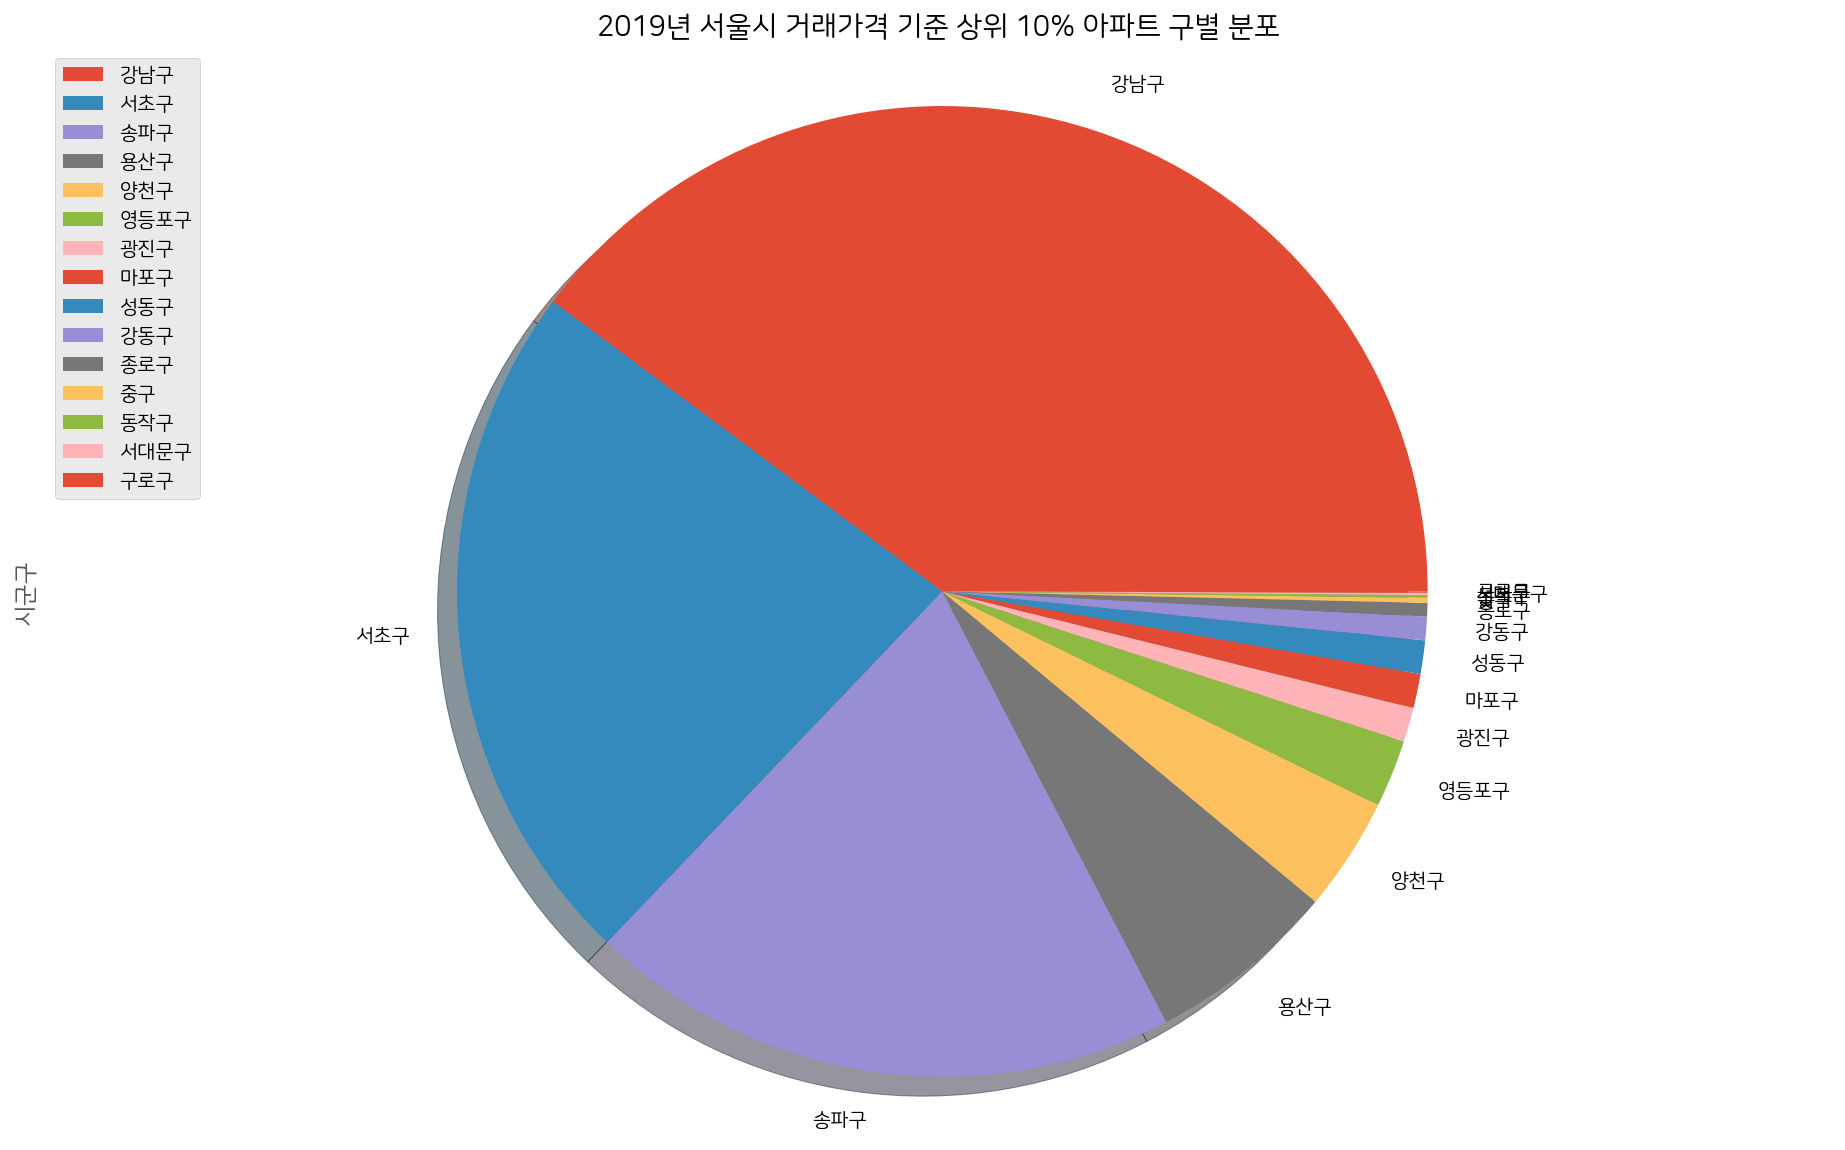

In [31]:
# 상위 10% pie plot 그리기
df_top_gu['시군구'].plot(kind='pie',
                    figsize=(16, 10),
                    shadow=True)

plt.title('2019년 서울시 거래가격 기준 상위 10% 아파트 구별 분포')
plt.axis('equal')

plt.legend(labels=df_top_gu.index, loc='upper left')

plt.show()

In [33]:
df_bottom_gu = df_bottom['시군구'].value_counts().to_frame()
df_bottom_gu

,시군구
노원구,753
도봉구,577
구로구,380
영등포구,307
강서구,242
중랑구,225
동대문구,208
은평구,193
금천구,171
강동구,150


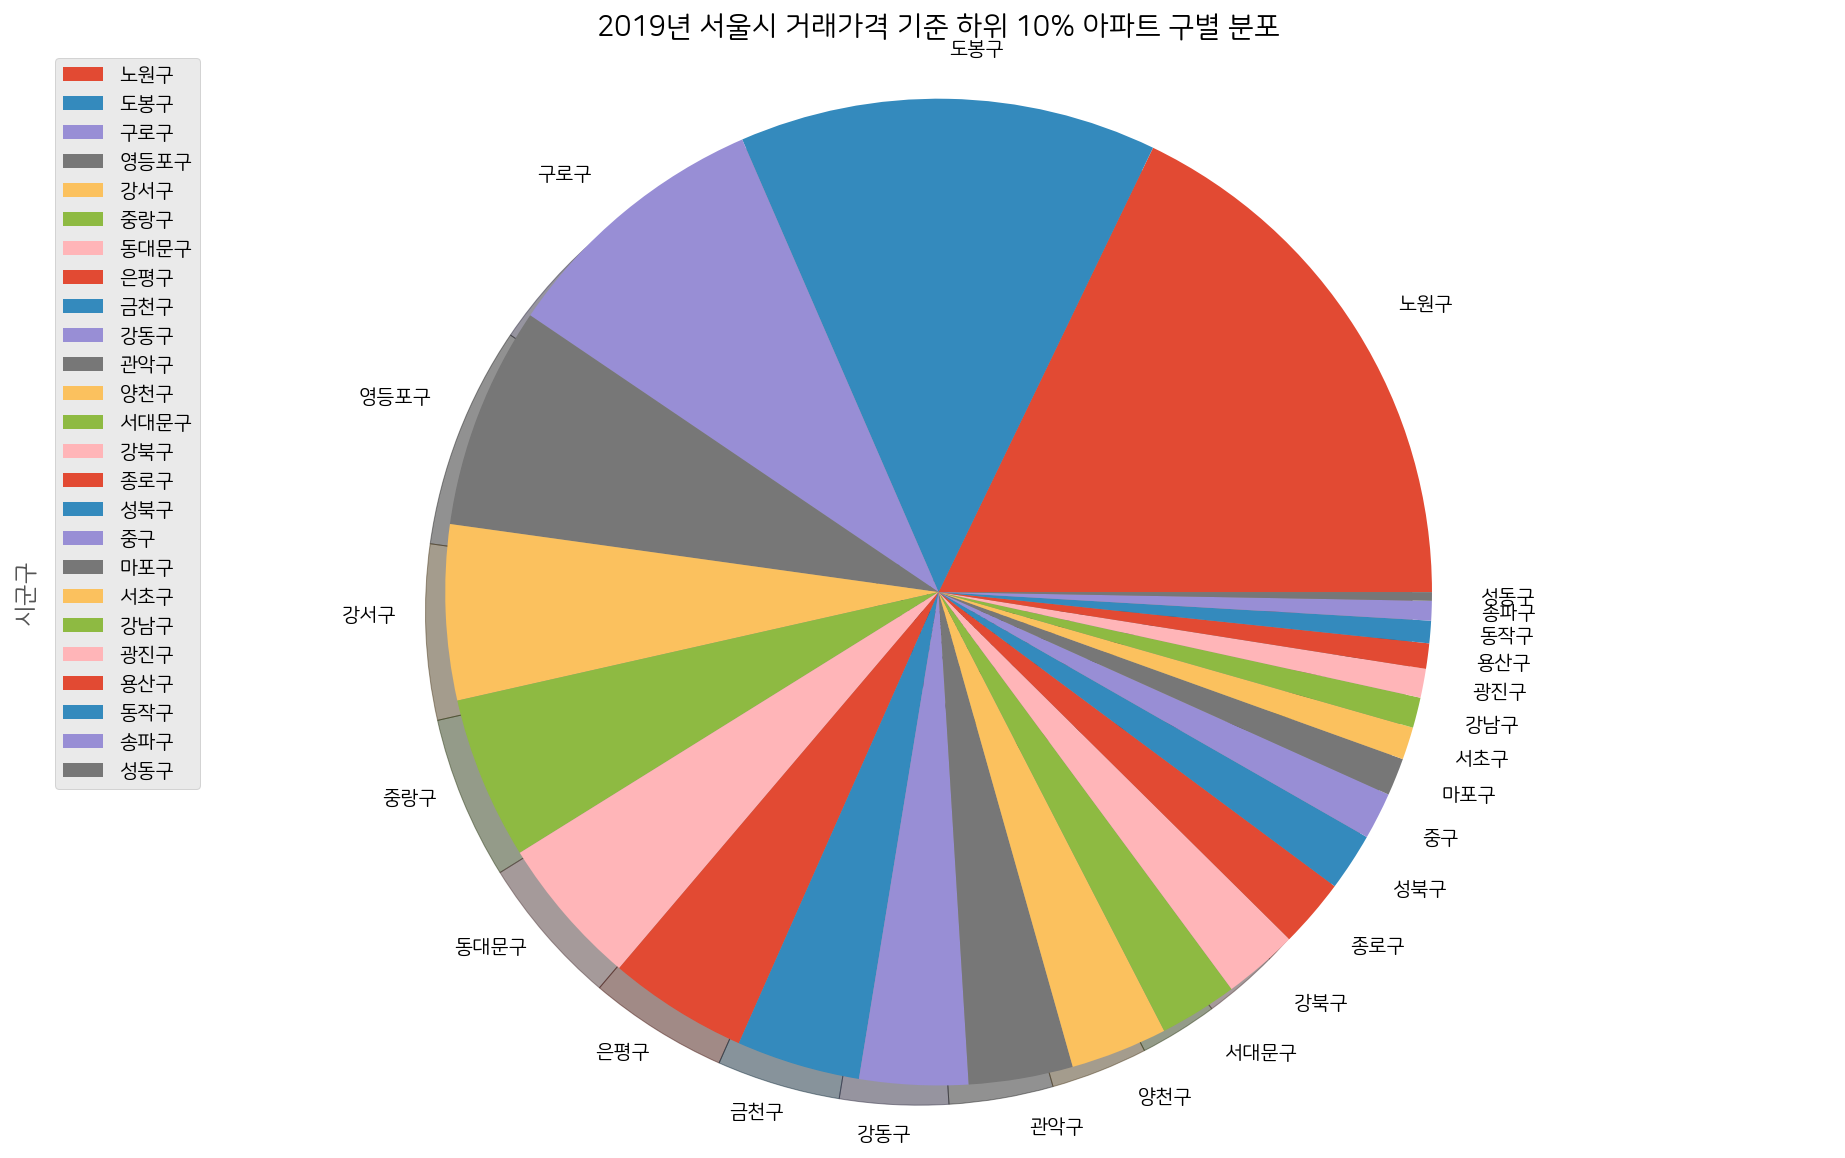

In [36]:
# 하위 10% pie plot 그리기
df_bottom_gu['시군구'].plot(kind='pie',
                    figsize=(16, 10),
                    shadow=True)

plt.title('2019년 서울시 거래가격 기준 하위 10% 아파트 구별 분포')
plt.axis('equal')

plt.legend(labels=df_bottom_gu.index, loc='upper left')

plt.show()

In [19]:
df_money = df.loc[:, '거래금액']
df_money.head()

1477     840000
19350    820000
8179     730000
12525    695000
34595    690000
Name: 거래금액, dtype: int64

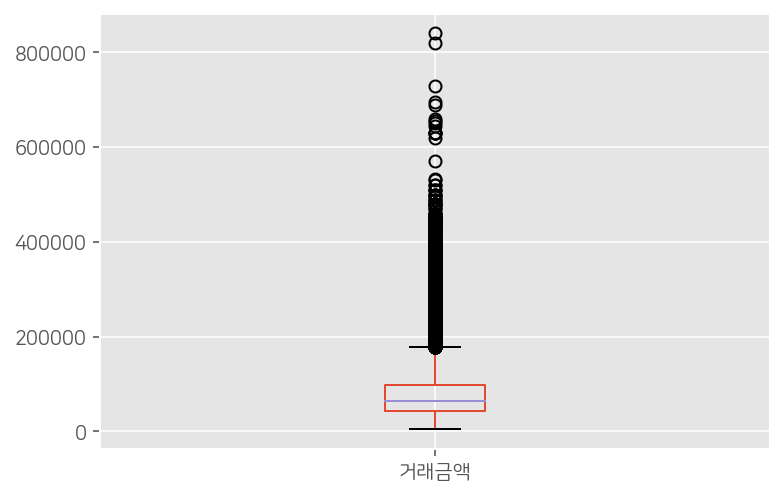

In [20]:
# 거래금액 box plot 확인하기
df_money.plot(kind='box')

In [21]:
# outlier 분포가 너무 밀집되어 있어서 확인이 어려움
# 일단 값을 다시 보자 

df_money.describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
거래금액,42198.0,80170.487488,58330.26678,5400.0,42500.0,64000.0,97000.0,840000.0


최고가는 84억, 최저가는 5400만원, 평균값은 8억원으로 기록됨.
하지만, 위 결과를 보고 `서울에서 아파트를 사기 위해서는 평균 8억원이 든다.`라고 단정지을 수는 없음.

=> outlier = Q3 + 1.5 *(Q3 - Q1) = `약 17억 8천원 이상`의 값들 분포가 상당수 차지하기 때문에 평균값이 상향평준화되어 있고, 아파트간의 가격 격차가 큰 편이라 볼 수 있다.



In [22]:
# 금액을 5천만원 단위로 나누어 histogram을 그려보자
# 1. 5천만원 단위로 grouping 하기
